In [11]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA, SparsePCA, KernelPCA, NMF
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import tensorflow as tf
from sklearn_wrappers import spca_exp_faces, kernel_exp, autoencoder_exp, nmf_exp_faces
import kernel_pca as kpca

In [12]:
# Takes 6 minutes to load the data if this is your first time
lfw_people = fetch_lfw_people(min_faces_per_person=100)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print(f'No. of features in face dataset: {n_features}')

No. of features in face dataset: 2914


In [13]:
def plot_gallery(images, titles, k, h, w):
    """Helper function to plot a gallery of portraits"""
    n_col = 5
    if k <= n_col:
        n_row = 1
    else:
        n_row = k // 5 + 1
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(k):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [14]:
def run_test_sweep(X_train, X_test, is_faces, dataset_name, num_dataset_dims=None):
    if is_faces:
        k_list = [1, 2, 3, 4]
        for k in k_list:
            print("Number of components: k =",k)
            
            # SPCA
            if k < 5:
                best_spca_alpha, best_spca_alpha_err, best_eigenfaces_spca = spca_exp_faces(X_train,X_test,k,h,w)
            
            # KPCA
            best_kernel, best_kernel_err = kernel_exp(X_train,X_test,k)

            # Our own KPCA implementation
            X_recon_kernel_pca, X_recon_kernel_pca_err = kpca.kernel_PCA(X_train, X_test, n_components=k, kernel='rbf', gamma=0.0433, mode='recon', alpha=1.0)
            
            # Autoencoder
            _, best_autoencoder_err = autoencoder_exp(X_train, X_test, k)
            
            # NMF
            nmf_err_train, nmf_err_test, eigenfaces_nmf = nmf_exp_faces(X_train,X_test,k,h,w)
            
            # ==> Summary
            print("- MSE loss summary: ",dataset_name,"is_faces =",is_faces,"k =",k)
            print("-- Sparse PCA (alpha=",best_spca_alpha,"): err=",best_spca_alpha_err)
            print("-- Kernel PCA(",best_kernel,"): err=",best_kernel_err)
            print("-- Autoencoder: err=",best_autoencoder_err)
            print("-- NMF: err=",nmf_err_test)

            eigenface_titles_spca = [f"SPCA eigenface {i}" for i in range(best_eigenfaces_spca.shape[0])]
            plot_gallery(best_eigenfaces_spca, eigenface_titles_spca, k, h, w)
            plt.show()

            eigenface_titles_nmf = [f"NMF eigenface {i}" for i in range(eigenfaces_nmf.shape[0])]
            plot_gallery(eigenfaces_nmf, eigenface_titles_nmf, k, h, w)
            plt.show()

    else:
        for k in range(1,num_dataset_dims):
            print("Number of components: k =",k)
            
            # SPCA
            best_spca_alpha, best_spca_alpha_err = spca_exp(X_train,X_test,k)
            
            # KPCA
            best_kernel, best_kernel_err = kernel_exp(X_train,X_test,k)
            
            # Autoencoder
            _, best_autoencoder_err = autoencoder_exp(X_train, X_test, k)
            
            # NMF
            _, best_nmf_err = nmf_exp(X_train,X_test,k)
            
            # ==> Summary
            print("- MSE loss summary: ",dataset_name,"is_faces =",is_faces,"k =",k)
            print("-- Sparse PCA (alpha=",best_spca_alpha,"): err=",best_spca_alpha_err)
            print("-- Kernel PCA(",best_kernel,"): err=",best_kernel_err)
            print("-- Autoencoder: err=",best_autoencoder_err)
            print("-- NMF: err=",best_nmf_err)

Number of components: k = 1
alpha= 0.001 err= 0.026645977
alpha= 0.002 err= 0.026645988
alpha= 0.005 err= 0.026646001
alpha= 0.01 err= 0.026646066
alpha= 0.02 err= 0.026646076


Best SPCA:
- alpha: 0.001
- err: 0.026645977
Kernel PCA ( Linear kernel ) MSE reconstruction loss: 0.018024206
- New best kernel
Kernel PCA ( RBF kernel, $\gamma=0.04$ ) MSE reconstruction loss: 0.02216188
Kernel PCA ( Sigmoid kernel, $\gamma=10^{-3}, r=1$ ) MSE reconstruction loss: 0.0213955


Best MSE reconstruction error: 0.018024206
- Kernel: Linear kernel
reconstructing test data
rbf kernel, mse err = 0.021753345408448616
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2914)]            0         
                                                                 
 encoding (Dense)            (None, 1)                 2915      
                                            

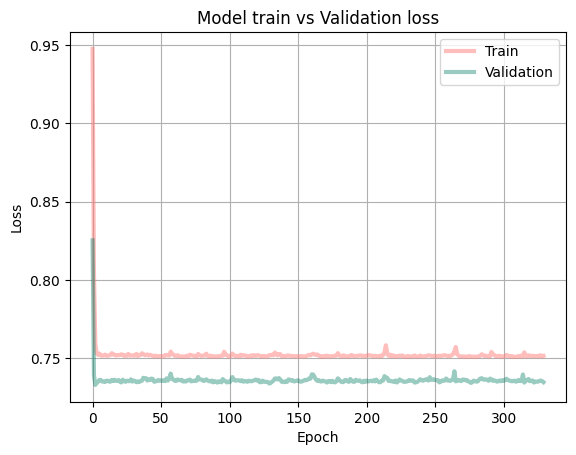

Training loss: 0.7514002919197083
Validation loss: 0.7346342206001282
MSE on training data: 0.017921481970844883
MSE on test data: 0.018019743259585486


Best NMF:
Basis vectors:
 [[0.6624606  0.65458393 0.6962086  ... 0.8018706  0.7498391  0.69573545]]
Coefficients:
 [[0.6161301 ]
 [0.60304046]
 [0.627451  ]
 [0.41789624]
 [0.63249856]
 [0.5024411 ]
 [0.4413323 ]
 [0.7132234 ]
 [0.54054385]
 [0.43740502]
 [0.73666245]
 [0.6412884 ]
 [0.44545484]
 [0.5138876 ]
 [0.6452055 ]
 [0.4976439 ]
 [0.5048069 ]
 [0.66385055]
 [0.7460015 ]
 [0.49657854]
 [0.607382  ]
 [0.5166679 ]
 [0.32906458]
 [0.5126591 ]
 [0.6051469 ]
 [0.57407826]
 [0.5136106 ]
 [0.6369341 ]
 [0.64342505]
 [0.5839337 ]
 [0.59259045]
 [0.5885031 ]
 [0.7060407 ]
 [0.6192891 ]
 [0.61381924]
 [0.47386318]
 [0.5991383 ]
 [0.48303926]
 [0.5180748 ]
 [0.4903122 ]
 [0.69144356]
 [0.6718167 ]
 [0.67449224]
 [0.52171123]
 [0.5488657 ]
 [0.6772956 ]
 [0.6421644 ]
 [0.54676396]
 [0.5557586 ]
 [0.798678  ]
 [0.5478414 ]
 [0.39249527]
 [0

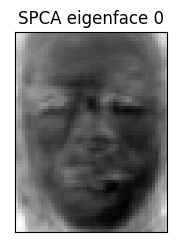

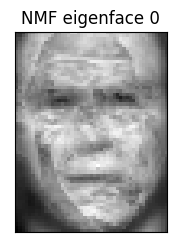

Number of components: k = 2
alpha= 0.001 err= 0.025733378
alpha= 0.002 err= 0.025733355
alpha= 0.005 err= 0.02573329
alpha= 0.01 err= 0.025733199
alpha= 0.02 err= 0.02573301


Best SPCA:
- alpha: 0.02
- err: 0.02573301
Kernel PCA ( Linear kernel ) MSE reconstruction loss: 0.015072246
- New best kernel
Kernel PCA ( RBF kernel, $\gamma=0.04$ ) MSE reconstruction loss: 0.02216188
Kernel PCA ( Sigmoid kernel, $\gamma=10^{-3}, r=1$ ) MSE reconstruction loss: 0.021030594


Best MSE reconstruction error: 0.015072246
- Kernel: Linear kernel
reconstructing test data
rbf kernel, mse err = 0.021248043295164745
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2914)]            0         
                                                                 
 encoding (Dense)            (None, 2)                 5830      
                                              

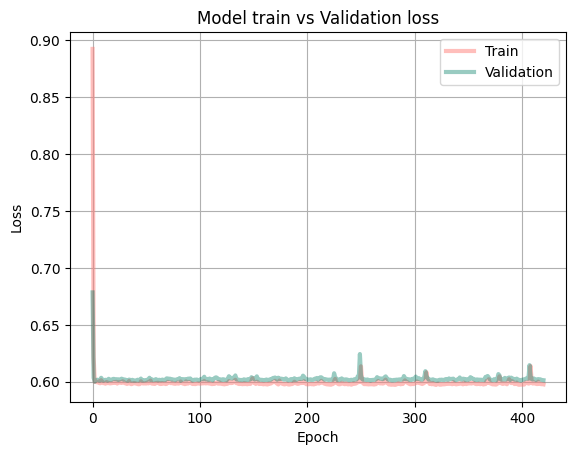

Training loss: 0.5976979732513428
Validation loss: 0.6013219952583313
MSE on training data: 0.01484435077409103
MSE on test data: 0.01510363915438497


Best NMF:
Basis vectors:
 [[0.22673269 0.24063288 0.2652067  ... 0.8210099  0.7964271  0.7492775 ]
 [0.5555565  0.5302984  0.5536029  ... 0.05820763 0.02217835 0.00897871]]
Coefficients:
 [[0.47559392 0.6119578 ]
 [0.6059835  0.43080467]
 [0.56206954 0.5301567 ]
 ...
 [0.51308537 0.4610312 ]
 [0.64703834 0.35069996]
 [0.40876624 0.48106584]]


Best MSE reconstruction error on train data: 0.014777569
Best MSE reconstruction error on test data: 0.0149654085
- MSE loss summary:  faces is_faces = True k = 2
-- Sparse PCA (alpha= 0.02 ): err= 0.02573301
-- Kernel PCA( Linear kernel ): err= 0.015072246
-- Autoencoder: err= 0.01510363915438497
-- NMF: err= 0.0149654085


c:\Users\Jasmine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


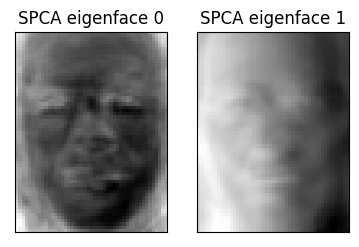

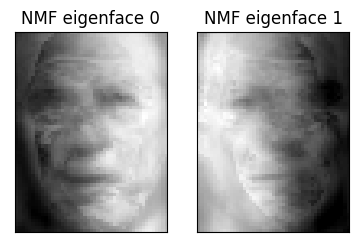

Number of components: k = 3
alpha= 0.001 err= 0.025171451
alpha= 0.002 err= 0.025171362


KeyboardInterrupt: 

In [15]:
run_test_sweep(X_train, X_test, is_faces=True, dataset_name='faces')

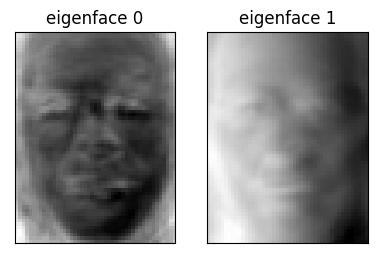

In [ ]:
# eigenface_titles_spca = [f"eigenface {i}" for i in range(best_eigenfaces_spca.shape[0])]
# plot_gallery(best_eigenfaces_spca, eigenface_titles_spca, h, w)

# plt.show()

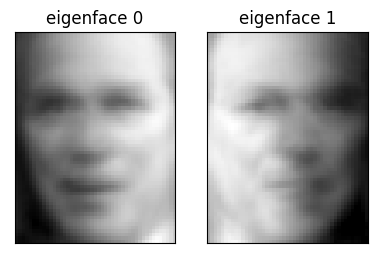

In [ ]:
# eigenface_titles_nmf = [f"eigenface {i}" for i in range(eigenfaces_nmf.shape[0])]
# plot_gallery(eigenfaces_nmf, eigenface_titles_nmf, h, w)

# plt.show()
